# Pedram Peiro Asfia
## 9825006
### Final Project

# Part 1: Importing libraries

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)

# Part 2: Feature Exploration

In [2]:
df=pd.read_csv(r"D:\uni\ترم 5\تحلیل داده و اطلاعات\Project\train.csv")
df_test=pd.read_csv(r"D:\uni\ترم 5\تحلیل داده و اطلاعات\Project\test.csv")
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
# In this step we try to extract some information from our datetime column, information like year, month, weekday, hour.
df['datetime']=pd.to_datetime(df.datetime)
df['year']=np.where(df.datetime.dt.year==2011 , 0 ,1) #because we only have 2 years (2011 and 2012)
df['month']=df.datetime.dt.month
df['weekday']=df.datetime.dt.dayofweek #Monday is 0
df['hour']=df.datetime.dt.hour
# Do the same thing for test df
df_test['datetime']=pd.to_datetime(df_test.datetime)
df_test['year']=np.where(df_test.datetime.dt.year==2011 , 0 ,1) #because we only have 2 years (2011 and 2012)
df_test['month']=df_test.datetime.dt.month
df_test['weekday']=df_test.datetime.dt.dayofweek #Monday is 0
df_test['hour']=df_test.datetime.dt.hour
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,weekday,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,5,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,0,1,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,0,1,5,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,0,1,5,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,0,1,5,4


In [4]:
# we should rmeove registered and casual columns because they are directly related to count
df=df.drop(['casual' , 'registered'] , axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   count       10886 non-null  int64         
 10  year        10886 non-null  int32         
 11  month       10886 non-null  int64         
 12  weekday     10886 non-null  int64         
 13  hour        10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int32(1), int64(9)
memory usage: 1.1 MB


In [5]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,weekday,hour
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,191.574132,0.501929,6.521495,3.013963,11.541613
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,181.144454,0.500019,3.444373,2.004585,6.915838
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,42.000000,0.000000,4.000000,1.000000,6.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,145.000000,1.000000,7.000000,3.000000,12.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,284.000000,1.000000,10.000000,5.000000,18.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,977.000000,1.000000,12.000000,6.000000,23.000000


In [6]:
print('shape of df:' , df.shape , '\n\ncolumns of df:' , df.columns)

shape of df: (10886, 14) 

columns of df: Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'count', 'year', 'month', 'weekday',
       'hour'],
      dtype='object')


# Part 3: Missing Values Detection

In [7]:
df.isnull().any()

datetime      False
season        False
holiday       False
workingday    False
weather       False
temp          False
atemp         False
humidity      False
windspeed     False
count         False
year          False
month         False
weekday       False
hour          False
dtype: bool

all of the features are complete.

# Part 4: Feature Selection
for feature selection we can plot correlation matrix heatmap using seaborn.
<br>the closer the values inside each box get to +1 or -1, the more the correlation is. 


###### Note that pearson's r coefficient is only used for 2 numerical variables. so we cannot compare our target ('count') with variables like season, holiday and ..., and we should use other methods to see whether they are correlated or not

<IPython.core.display.Javascript object>


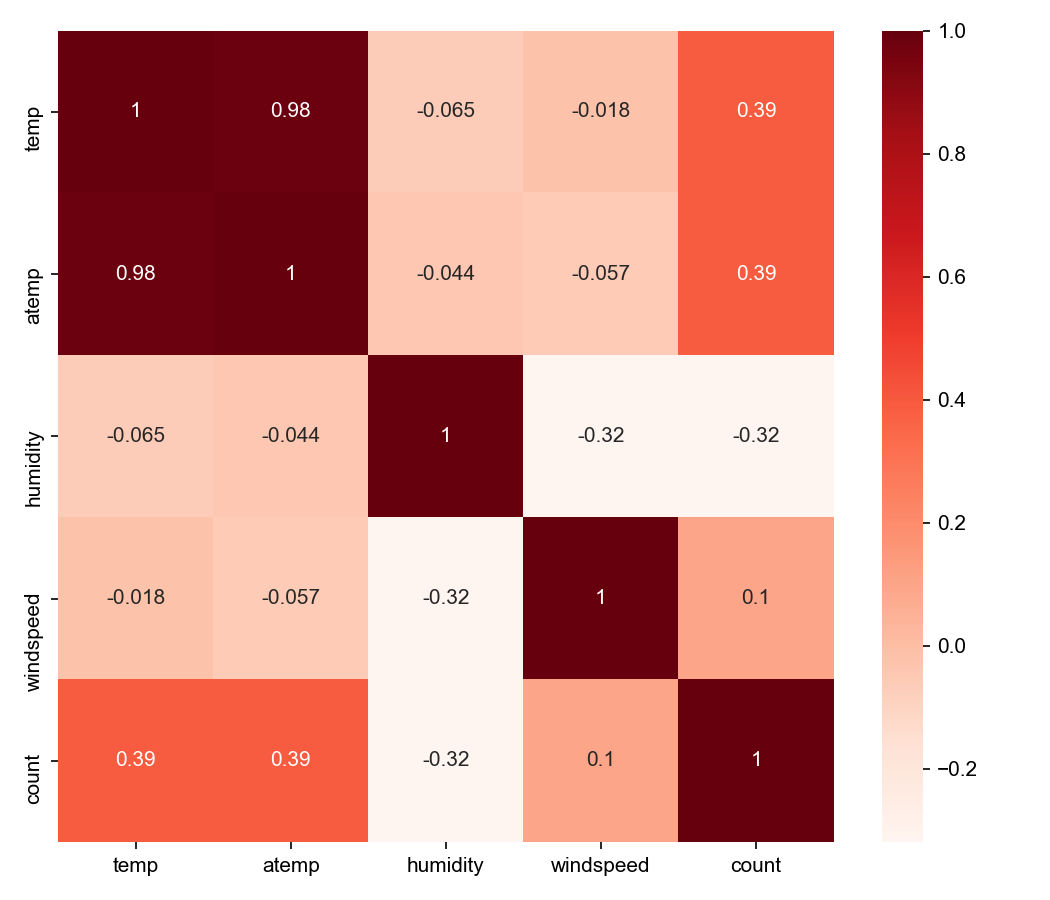

In [8]:
df_numeric=df[['temp' , 'atemp' ,'humidity' , 'windspeed' , 'count']]
plt.figure(figsize=(7,6))
cor = df_numeric.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.tight_layout()
plt.show()

#Here you can see the heatmap matrix of correlation between different continuous features.

as it is clearly shown above, **temp** and **atemp** features both have high correlation and they also have same correlation with our target value, **count** , so we should only keep one of them, I choose *temp*

### Scatter Plot for all of the remaining features with "count"

<IPython.core.display.Javascript object>


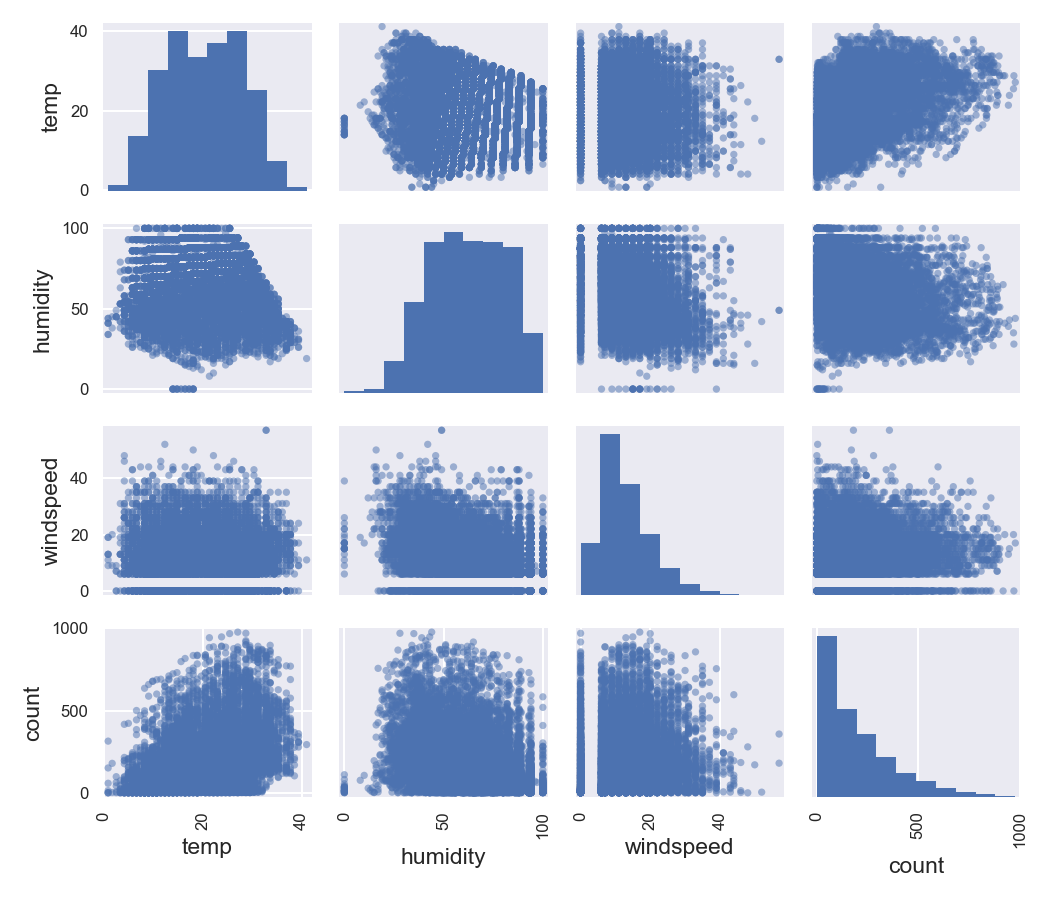

In [9]:
# plt.figure()
plt.style.use('seaborn')
df_numeric=df[['temp' , 'humidity' , 'windspeed' , 'count']]
pd.plotting.scatter_matrix(df_numeric , figsize=(7,6) , alpha=0.5)
plt.tight_layout()
plt.show()

from the scatter matrix we can conclude that the more the windspeed is, it is more unlikely that someone rent a bike
<br> also humidity is not very related to count

In [10]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'count', 'year', 'month', 'weekday',
       'hour'],
      dtype='object')

<IPython.core.display.Javascript object>


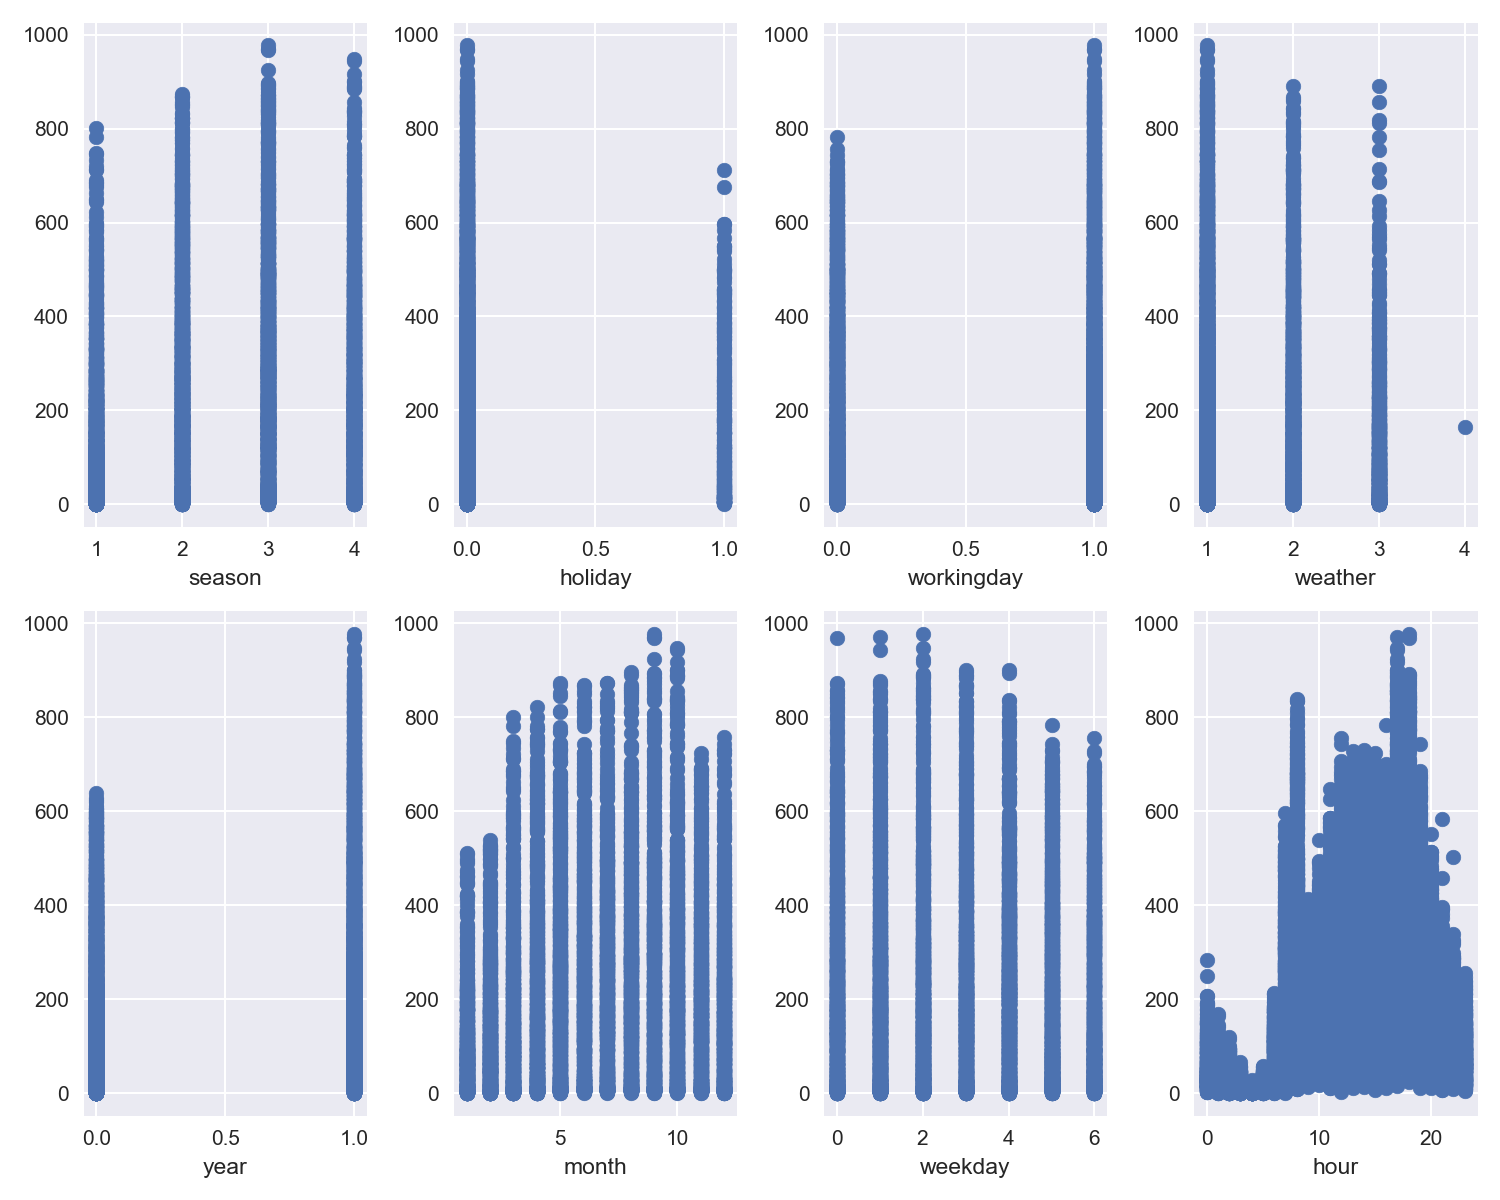

In [11]:
plt.figure(figsize=(10,8))
plt.style.use('seaborn')
import matplotlib.gridspec as gridspec
gspec=gridspec.GridSpec(2,4)

top1=plt.subplot(gspec[0,0])
top2=plt.subplot(gspec[0,1])
top3=plt.subplot(gspec[0,2])
top4=plt.subplot(gspec[0,3])
down1=plt.subplot(gspec[1,0])
down2=plt.subplot(gspec[1,1])
down3=plt.subplot(gspec[1,2])
down4=plt.subplot(gspec[1,3])



top1.scatter(df.season , df['count'])
top1.set_xlabel('season')
top2.scatter(df.holiday , df['count'])
top2.set_xlabel('holiday')
top3.scatter(df.workingday , df['count'])
top3.set_xlabel('workingday')
top4.scatter(df.weather , df['count'])
top4.set_xlabel('weather')
down1.scatter(df.year , df['count'])
down1.set_xlabel('year')
down2.scatter(df.month , df['count'])
down2.set_xlabel('month')
down3.scatter(df.weekday , df['count'])
down3.set_xlabel('weekday')
down4.scatter(df.hour , df['count'])
down4.set_xlabel('hour')
plt.tight_layout()

from the visualization above, we understand that people prefer to rent more bikes on workingdays, when itis not Holiday , when the sky is clear, more on 2012, and probably in the afternoon (we will have a closer look at hour)

<IPython.core.display.Javascript object>


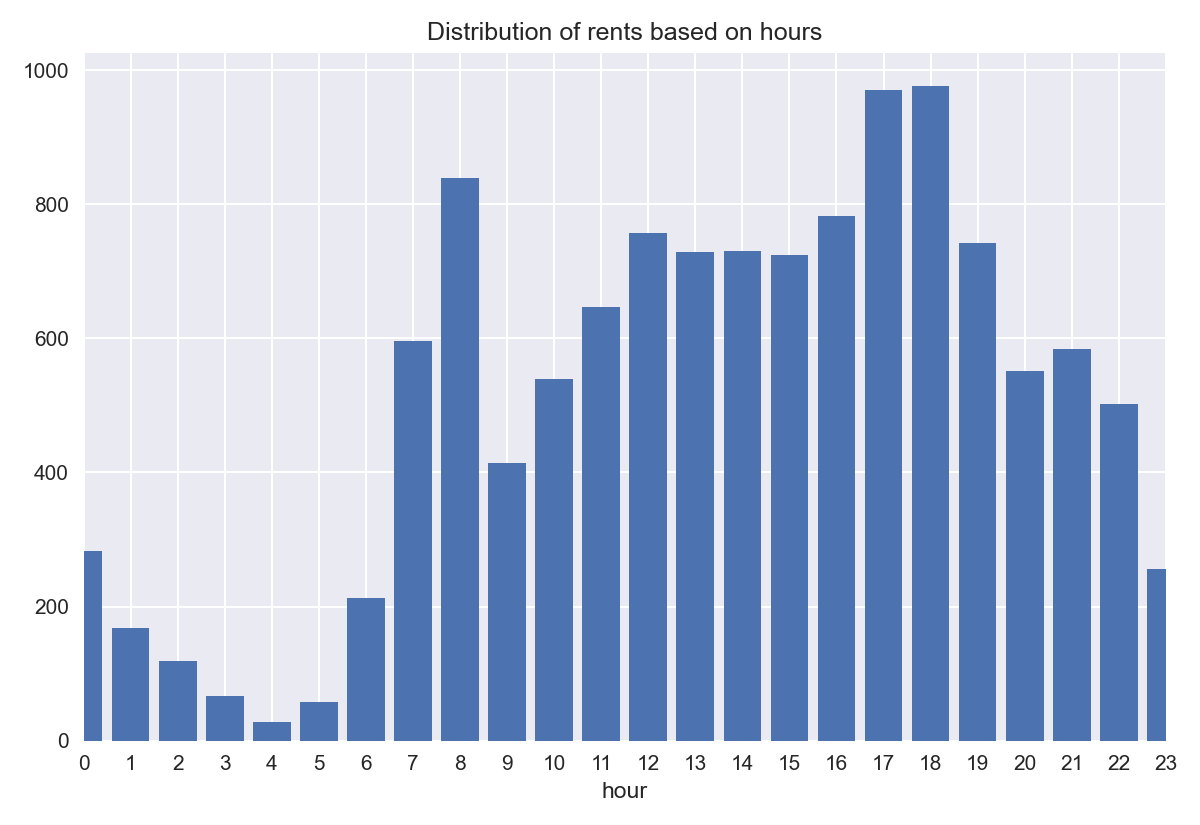

In [12]:
plt.figure()
plt.bar(df.hour ,df['count'] )
plt.xlim((0,23))
plt.xticks(range(0,24))
plt.xlabel('hour')
plt.title('Distribution of rents based on hours')
plt.tight_layout()
plt.show()

so we understand people tend to rent more bikes on 17 or 18

# Part 5: Model Training (You Can Find The *Final* Model In The Next Header
<br> we should start with removing extra columns

In [13]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'count', 'year', 'month', 'weekday',
       'hour'],
      dtype='object')

In [14]:
X=df[[x for x in df.columns if x not in ['count','atemp' , 'datetime']]]
y=df.loc[: , 'count']

#making dummy variables for categorical features
X=pd.get_dummies(data=X , columns=['season' , 'holiday' , 'workingday' , 'windspeed' , 'year' , 'month' , 'weekday' , 'hour'],
                drop_first=True)
X.head()

,weather,temp,humidity,season_2,season_3,season_4,holiday_1,workingday_1,windspeed_6.0032,windspeed_7.0015,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,1,9.84,81,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,9.02,80,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,9.02,80,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,9.84,75,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,9.84,75,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
df_test=df_test[[x for x in df_test.columns if x not in ['atemp' , 'datetime']]]

# it seems like there are some mismatches in windpseed values in this df_test, so we have to replace them 
# with a close value to them
wind_test=[x for x in df_test.windspeed.unique()]
wind_train=[x for x in df.windspeed.unique()]
mismatch=[x for x in wind_test if x not in wind_train] #it has 2 values which are higher than 50.021 (which is the highest value in train dataset)
df_test['windspeed']=df_test['windspeed'].replace(mismatch , 50.0021)


#making dummy variables for categorical features
X_prediction_test=pd.get_dummies(data=df_test , columns=['season' , 'holiday' , 'workingday' , 'windspeed' , 'year' , 'month' , 'weekday' , 'hour'],
                drop_first=True)
X_prediction_test.head()

,weather,temp,humidity,season_2,season_3,season_4,holiday_1,workingday_1,windspeed_6.0032,windspeed_7.0015,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,1,10.66,56,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,10.66,56,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,10.66,56,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,10.66,56,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,10.66,56,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
not_in=[x for x in X.columns if x not in X_prediction_test.columns]
print('the missing columns in test dataset:',not_in)

the missing columns in test dataset: ['windspeed_47.9988', 'windspeed_51.9987', 'windspeed_56.9969']


In [17]:
# Only keeping the same features
X=X[[cols for cols in X.columns if cols not in not_in]]
X.head()

,weather,temp,humidity,season_2,season_3,season_4,holiday_1,workingday_1,windspeed_6.0032,windspeed_7.0015,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,1,9.84,81,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,9.02,80,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,9.02,80,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,9.84,75,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,9.84,75,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


now the dataframe is prepared for modeling

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
X_train,X_test , y_train,y_test=train_test_split(X , y , random_state=100)

##### First Try: Simple Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression

linreg=LinearRegression().fit(X_train , y_train)

print('train error={}\ntest error={}'.format(linreg.score(X_train , y_train) , linreg.score(X_test,y_test)))

train error=0.6927403263170966
test error=0.6941319296986125


##### Second Try: Polynomials

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(degree=2)

X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

linreg=LinearRegression().fit(X_train_poly , y_train)
print('train error={}\ntest error={}'.format(linreg.score(X_train_poly , y_train) , linreg.score(X_test_poly,y_test)))

train error=0.9442970025519676
test error=0.903003708967645


so far, using Polynomial Features with 2 degree has a great improvement in our model, but becuase it may lead us to overfitting, it would be better if we use this Features with a model that has a penalty, like lasso or ridge
<br> ro find the best **alpha parameter** for **ridge** we apply a GridSearch
<br><br> *NOTE THAT THE INPUT DATA SHOULD BE NORMALIZED*

In [22]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

X_scaled=MinMaxScaler().fit_transform(X)
poly=PolynomialFeatures(degree=2)
X_poly=poly.fit_transform(X_scaled)

ridge=Ridge()
grid_values={'alpha': [0.1,1 , 2,5,10 , 20,30,50,100]}
grid_ridge=GridSearchCV(ridge ,param_grid=grid_values)
grid_ridge.fit(X_poly , y)
print('best paramters= {}\nbest score= {}'.format(grid_ridge.best_params_ , grid_ridge.best_score_) )

best paramters= {'alpha': 30}
best score= 0.772289344609705


SO we conclude that if we want to use **Ridge Regression** with Polynomial Features degree=2 , the L2 Regularization parameter (alpha) should be 30

In [24]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

X_scaled=MinMaxScaler().fit_transform(X)
poly=PolynomialFeatures(degree=2)
X_poly=poly.fit_transform(X_scaled)

lasso=Lasso(max_iter=10000)
grid_values={'alpha': [0.001,0.01,0.1,1 , 2,5,10 , 20,30,50,100]}
grid_lasso=GridSearchCV(lasso ,param_grid=grid_values)
grid_lasso.fit(X_poly , y)
print('best paramters= {}\nbest score= {}'.format(grid_lasso.best_params_ , grid_lasso.best_score_) )

best paramters= {'alpha': 0.1}
best score= 0.7507737801911055


**The code above take a long time to run (30mins)**
<br>SO we conclude that if we want to use **Lasso Regression** with Polynomial Features degree=2 , the L1 Regularization parameter (alpha) should be 0.1
<br> **Because best score of Ridge is better than Lasso, we choose Ridge for the best model for now**

In [25]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
gbr = GradientBoostingRegressor()

grid_values={'learning_rate':np.linspace(0.1,1 , 10),'n_estimators':np.arange(100,1900,200) }
grid_gbr=GridSearchCV(gbr ,param_grid=grid_values)
grid_gbr.fit(X , y)
print('best paramters= {}\nbest score= {}'.format(grid_gbr.best_params_ , grid_gbr.best_score_) )

best paramters= {'learning_rate': 0.2, 'n_estimators': 1700}
best score= 0.7829420027750382


**the code above take a ong time for running (about 90mins) so you may want to not run it**

In [27]:
gbr = GradientBoostingRegressor(learning_rate=0.2 , n_estimators=1700).fit(X_train , y_train)
print(gbr.score(X_train,y_train) , gbr.score(X_test , y_test))

0.9717123353968763 0.9291275001296895


So we choose **Gradient Boosting Regressor** with parameters **(learning_rate=0.2 & n_estimators=1700)** as our predicting model<br>
because the cv_score is equal to **0.7829** which is the best among all models we have tried so far

# Final Model
#### As we previously mentioned, the best predictor I've found is GradientBosstingRegressor with parameters learning_rate=0.2 and n_estimators=1700 which was reached out with GridSearch. in this section we are going to use this model for predicting our test.csv dataset and also try different metrics to measure the goodness of this model

### 10 Fold Cross Validation Score for The Final Model

In [28]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
gbr = GradientBoostingRegressor(learning_rate=0.2 , n_estimators=1700)
cv_score= cross_val_score(gbr , X , y,cv=10)
print('each of 10 folds cross val score is {}\n\nthe average total score is {}'.format(cv_score , np.mean(cv_score)))

each of 10 folds cross val score is [0.32675005 0.77683452 0.89014942 0.89915596 0.88259923 0.78774746
 0.89772115 0.90159288 0.92306765 0.93011269]

the average total score is 0.821573100848334


### Other metrics
#### Because it takes a lot of time for Cross Validation to run each model and calculate its metrics , we use our predefined X_train, X_test, y_train, y_test for measuring the goodness of our model

In [31]:
from sklearn.metrics import mean_absolute_error, r2_score, median_absolute_error,mean_squared_error

gbr = GradientBoostingRegressor(learning_rate=0.2 , n_estimators=1700).fit(X_train , y_train)
print('MAE for our model (based on the splited dataset) is: {}'.format(mean_absolute_error(y_test , gbr.predict(X_test))))
print('R2 for our model (based on the splited dataset) is: {}'.format(r2_score(y_test , gbr.predict(X_test))))
print('Median Absolute Error for our model (based on the splited dataset) is: {}'.format(median_absolute_error(y_test , gbr.predict(X_test))))
print('MSE for our model (based on the splited dataset) is: {}'.format(mean_squared_error(y_test , gbr.predict(X_test))))
print('RMSE for our model (based on the splited dataset) is: {}'.format(np.sqrt(mean_squared_error(y_test , gbr.predict(X_test)))))

MAE for our model (based on the splited dataset) is: 31.653471054038057
R2 for our model (based on the splited dataset) is: 0.9291877151233694
Median Absolute Error for our model (based on the splited dataset) is: 20.3309283779628
MSE for our model (based on the splited dataset) is: 2282.1789896620635
RMSE for our model (based on the splited dataset) is: 47.77215705473287


## Prediction

In [32]:
predictions=gbr.predict(X_prediction_test)
predictions=[max(x,0) for x in predictions] #count shoul not be negative
predictions

[0,
 0,
 0,
 0,
 0,
 0,
 27.45702706521681,
 122.51167264558975,
 248.14968886479787,
 120.24638494331323,
 37.43183356080307,
 42.576246671994014,
 58.5339927024011,
 54.06756131335238,
 28.109016442621037,
 27.067951814182205,
 78.33448647901716,
 233.06554525020985,
 178.31877647445657,
 121.01905900493604,
 81.49760408183622,
 70.11376863952792,
 32.61649959481944,
 13.26359345988691,
 0,
 0,
 0,
 0,
 0,
 0,
 12.980101751137289,
 78.64103747614341,
 239.08623617988397,
 123.89955993270539,
 32.95184778222639,
 49.465021818602615,
 79.188248001847,
 107.43488503612627,
 85.88364298040577,
 64.756820166494,
 76.29925085351746,
 162.44550306840543,
 85.56622471272873,
 39.64945945273515,
 8.189000803141004,
 6.621605076413955,
 6.7051050528474985,
 28.04802686680232,
 0,
 25.664867674876465,
 25.687636071910784,
 7.722454616512685,
 0,
 0,
 0,
 0,
 20.17649113362892,
 68.86893852922434,
 108.2154518550419,
 83.87365195907118,
 81.59611280457499,
 167.90913382418864,
 126.9989007852349

### Thanks For Your Time